<a href="https://colab.research.google.com/github/ashraf9723/Zidio-Development-Internship/blob/main/Customer_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = "/Mall_Customers.csv"
data = pd.read_csv(path)
data.head(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
data.shape

(200, 5)

In [5]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
#To check total entries, rows/columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
#to check null value
data.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [9]:
#to plot missing value we usee the library
import missingno as msno


<Axes: >

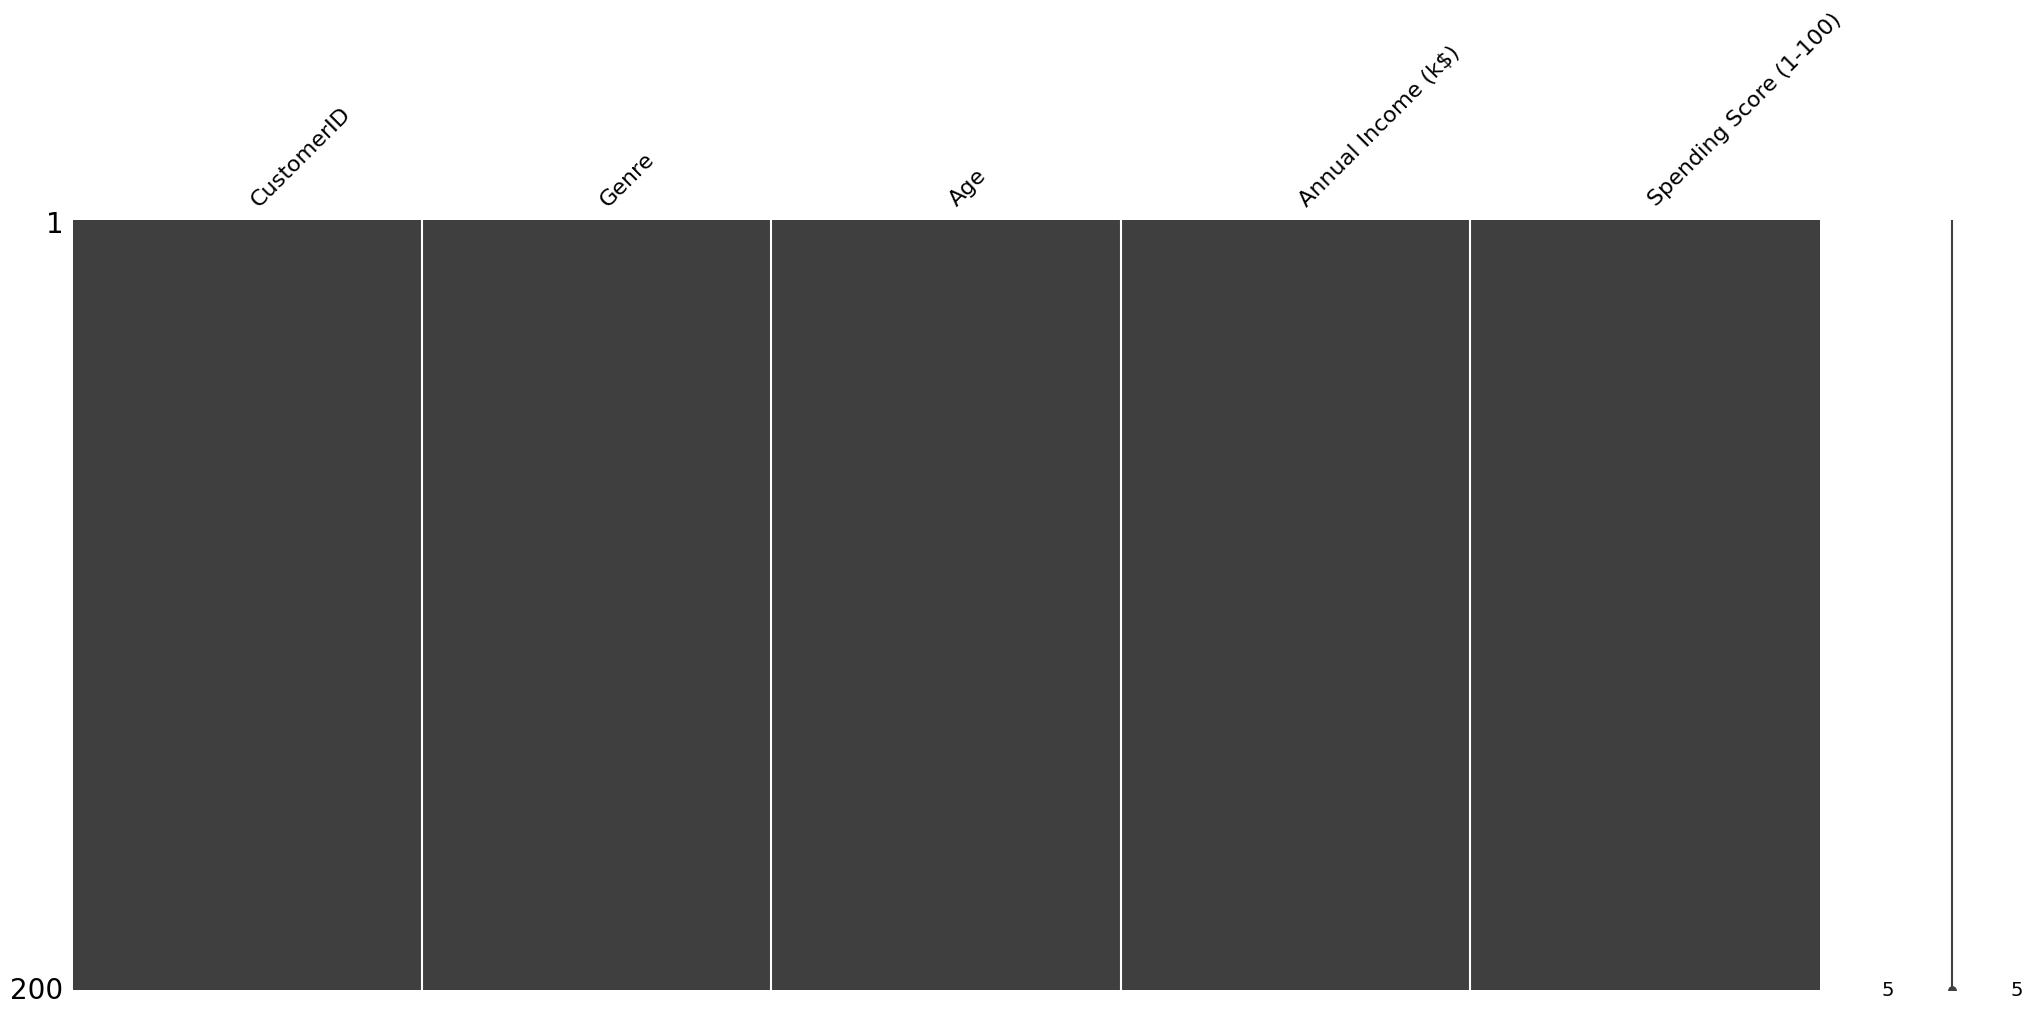

In [10]:
msno.matrix(data)

**Data Visualisation & EDA**

In [11]:
data.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

<ipython-input-14-743996c8d5fc>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Age'])
<ipython-input-14-743996c8d5fc>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Annual Income (k$)'])
<ipython-input-14-743996c8d5fc>:18: UserWarning: 

`distplot` is a deprecated function and w

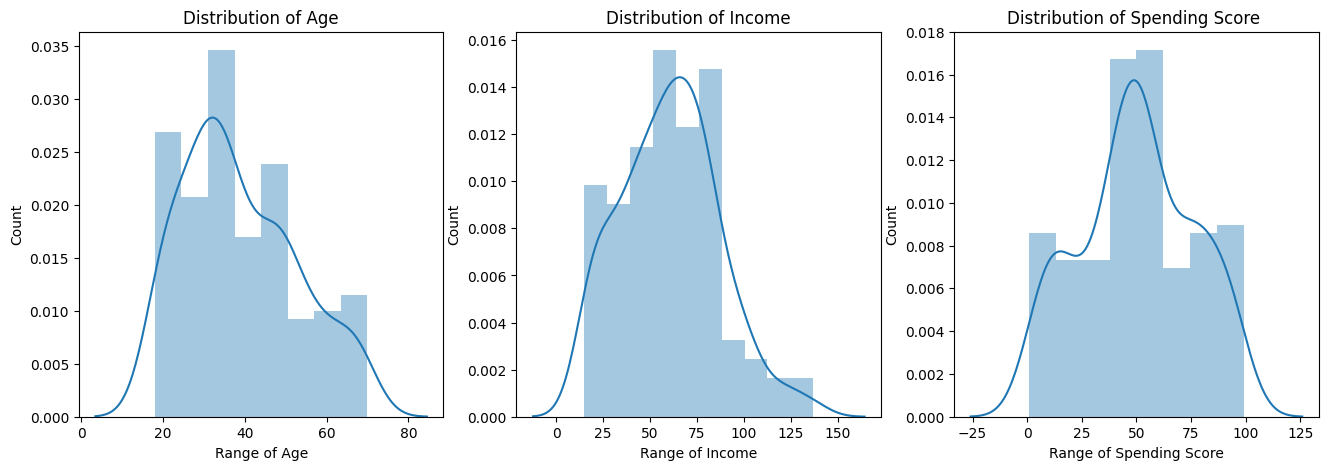

In [14]:
# Now I will take 3 columns do the distplot

plt.figure(figsize = (16,5))

plt.subplot(1,3,1)
sns.distplot(data['Age'])
plt.title("Distribution of Age")
plt.xlabel("Range of Age")
plt.ylabel("Count")

plt.subplot(1,3,2)
sns.distplot(data['Annual Income (k$)'])
plt.title("Distribution of Income")
plt.xlabel("Range of Income")
plt.ylabel("Count")

plt.subplot(1,3,3)
sns.distplot(data['Spending Score (1-100)'])
plt.title("Distribution of Spending Score ")
plt.xlabel("Range of Spending Score")
plt.ylabel("Count")

plt.show()

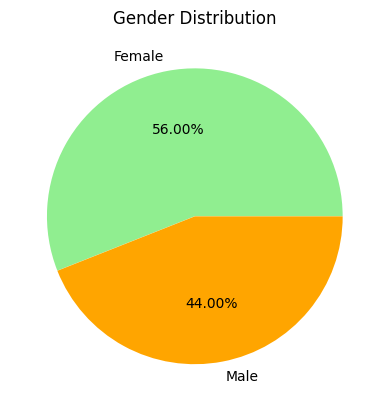

In [21]:
# Check how much % male and female come in the mall

df = data.groupby('Genre').size()
df.plot(kind='pie', sharex = True,
        colors = ['Lightgreen', 'orange'],
        explode = [0,0.001],
        labels = ['Female', 'Male'],
        autopct = '%.2f%%')
plt.title("Gender Distribution")
plt.ylabel("")
plt.show()

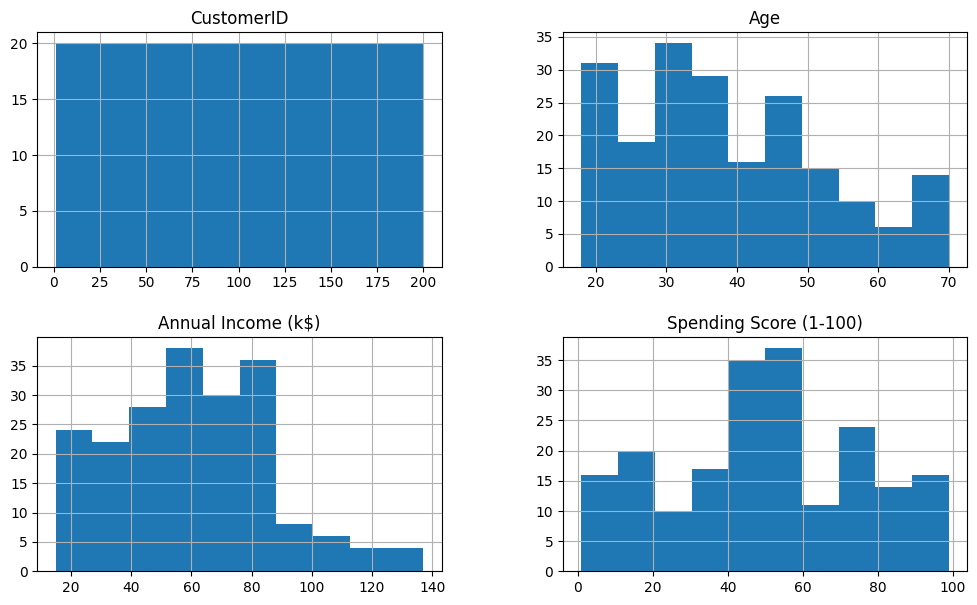

In [22]:
data.hist(figsize = (12,7))
plt.show()

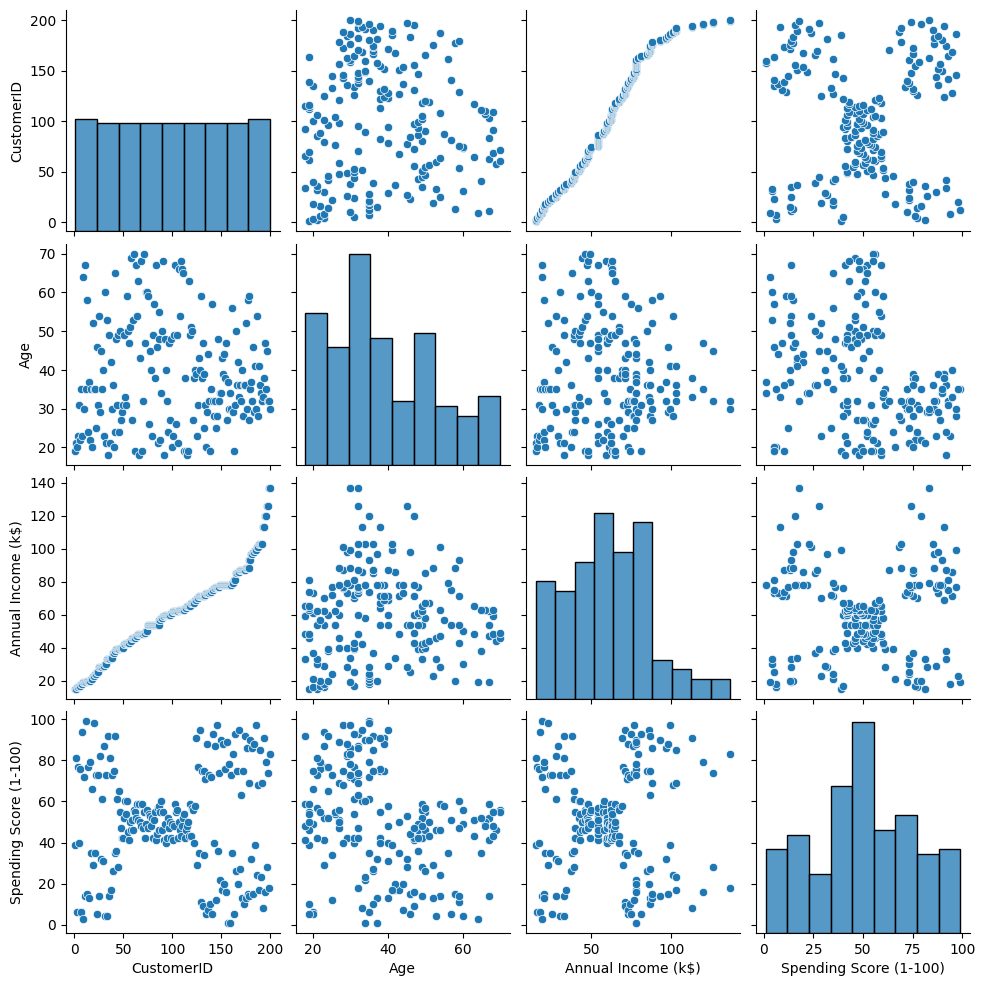

In [23]:
# To show cluster
sns.pairplot(data)
plt.show()

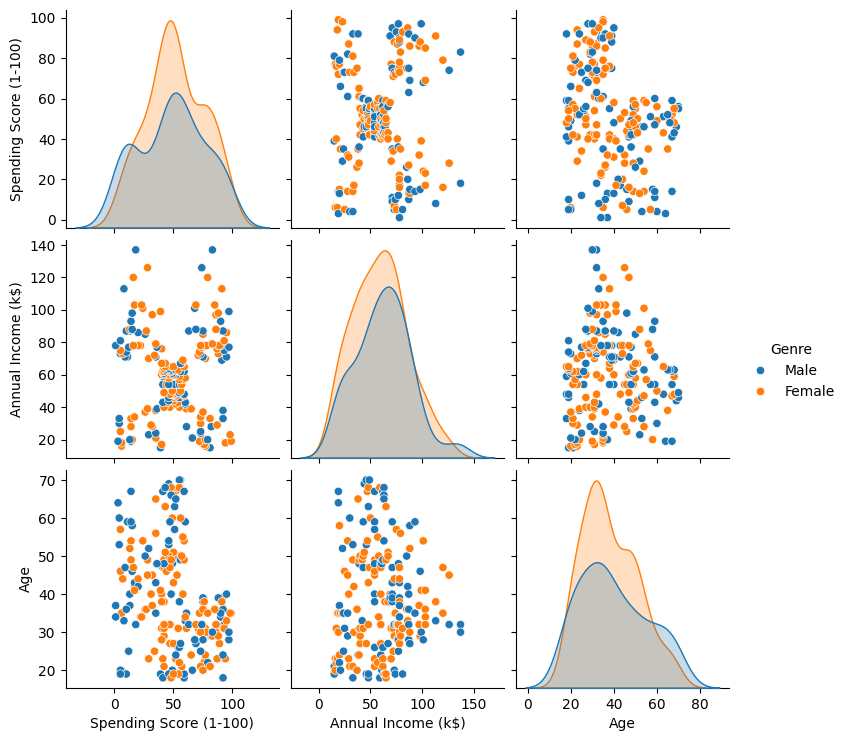

In [28]:
sns.pairplot(data, vars = ['Spending Score (1-100)',
                        'Annual Income (k$)', 'Age'], hue = 'Genre')

Text(0.5, 1.0, 'Distribution of Age')

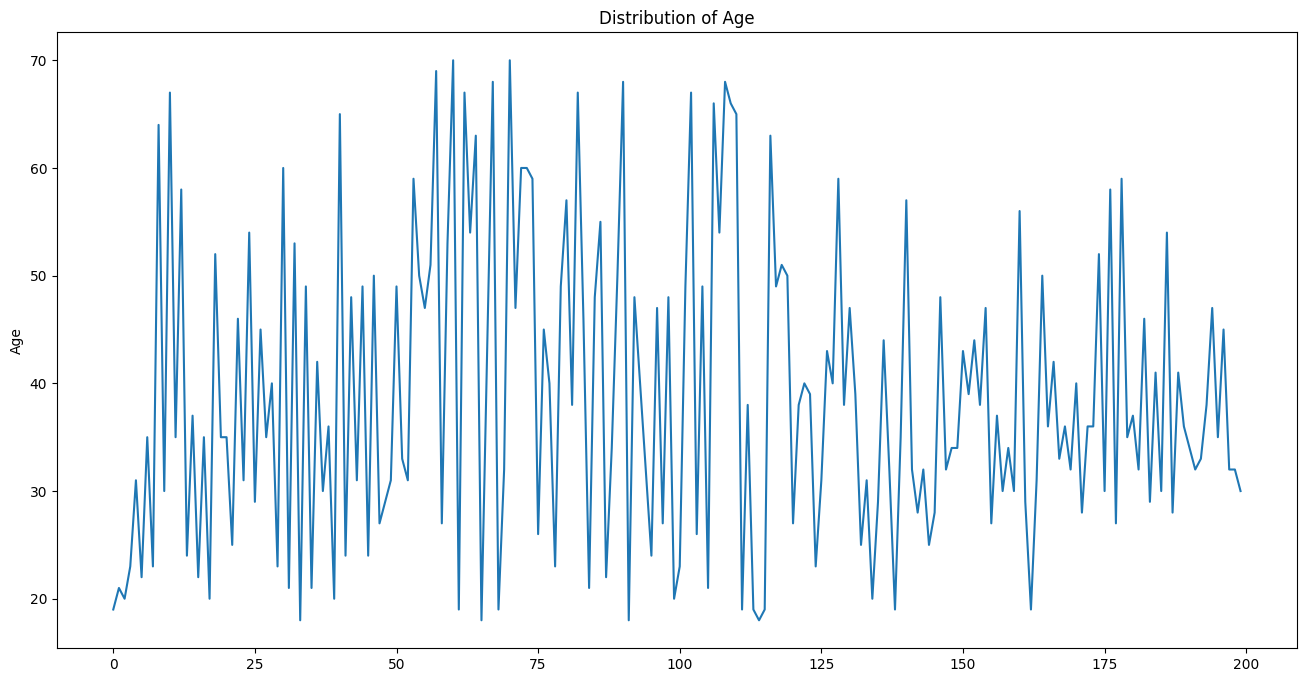

In [36]:
plt.figure(figsize = (16,8))
sns.lineplot(data['Age'])
plt.title("Distribution of Age")

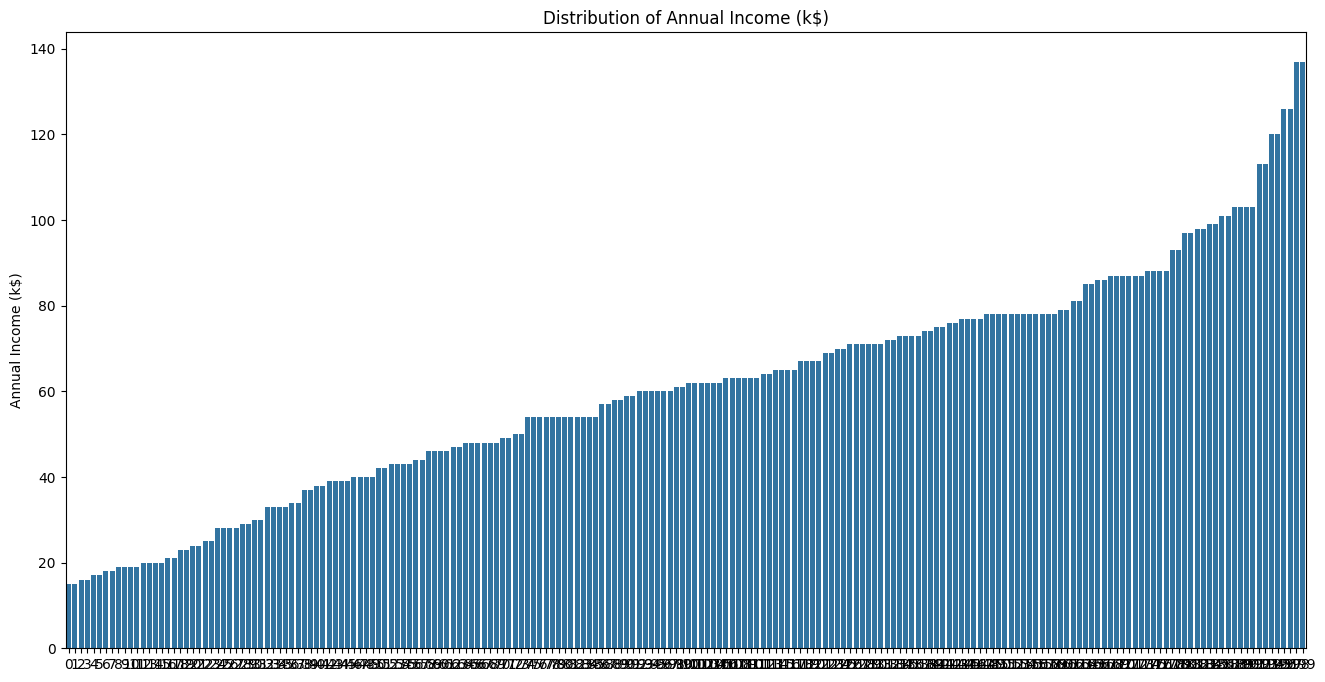

In [38]:
plt.figure(figsize = (16,8))
sns.barplot(data['Annual Income (k$)'])
plt.title("Distribution of Annual Income (k$)")
plt.show()

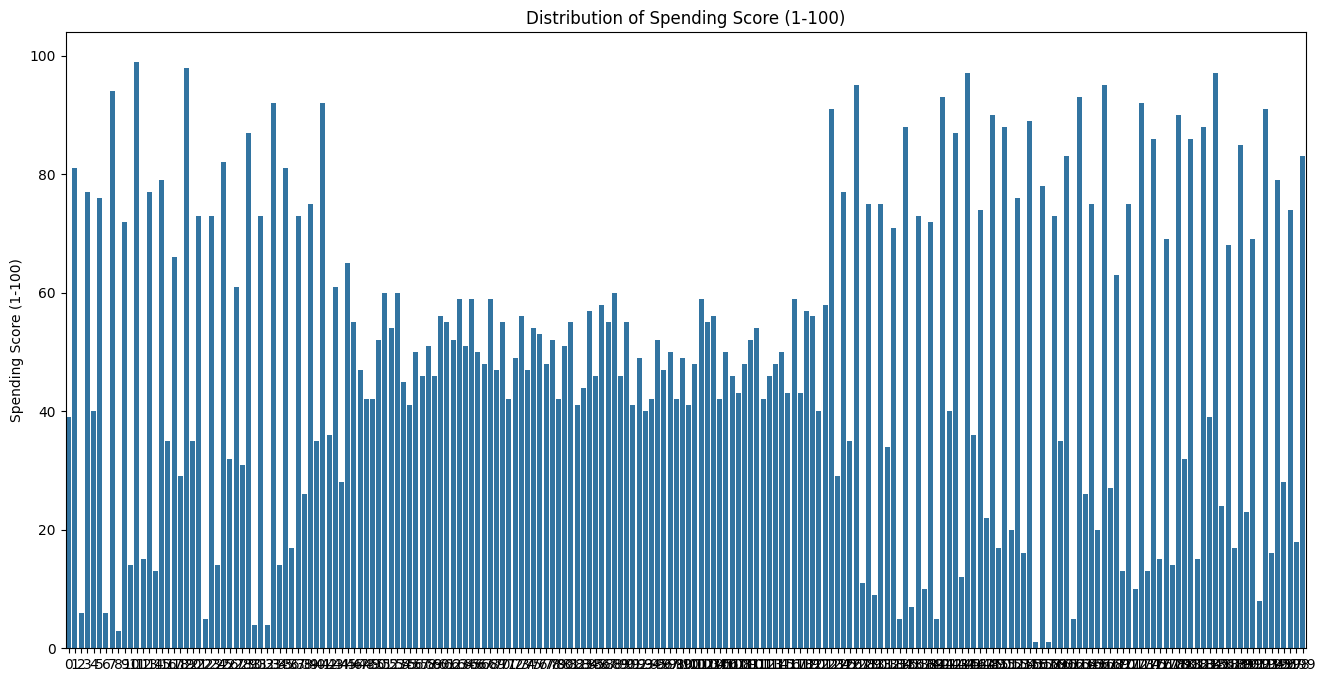

In [39]:
plt.figure(figsize = (16,8))
sns.barplot(data['Spending Score (1-100)'])
plt.title("Distribution of Spending Score (1-100)")
plt.show()

Target looks like regression


[<Axes: title={'center': 'Target distribution'}, xlabel='Spending Score (1...', ylabel='frequency'>,
 array([[<Axes: title={'center': 'F=-3.45E-01'}, xlabel='Age', ylabel='Spending Score (1...'>,
         <Axes: title={'center': 'F=7.84E-03'}, xlabel='Annual Income (k$)'>]],
       dtype=object),
 array([[<Axes: title={'center': 'F=5.08E-02'}, xlabel='Spending Score (1-100)', ylabel='Genre'>]],
       dtype=object)]

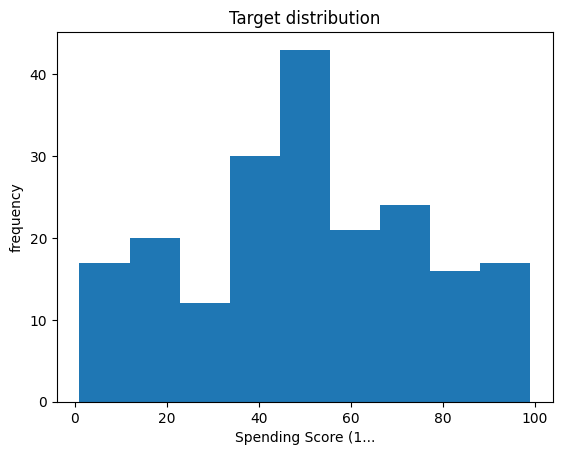

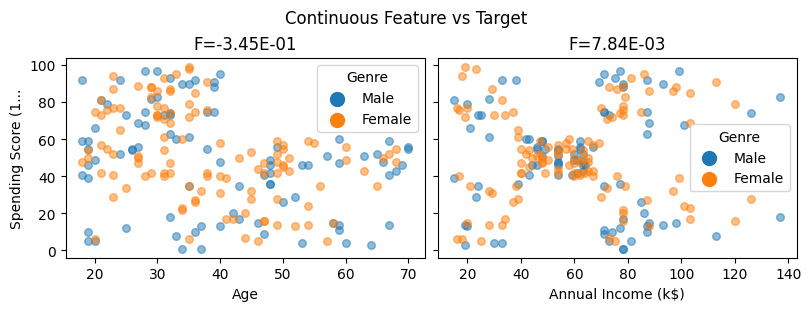

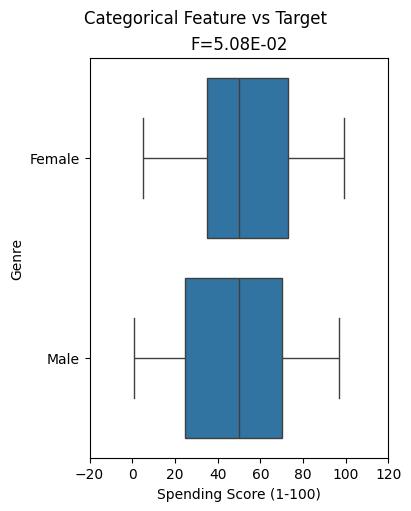

In [41]:
import  dabl
dabl.plot(data,target_col = 'Spending Score (1-100)')

Target looks like regression


[<Axes: title={'center': 'Target distribution'}, xlabel='Annual Income (k$)', ylabel='frequency'>,
 array([[<Axes: title={'center': 'F=1.98E-02'}, xlabel='Age', ylabel='Annual Income (k$)'>,
         <Axes: title={'center': 'F=7.84E-03'}, xlabel='Spending Score (1-100)'>]],
       dtype=object),
 array([[<Axes: title={'center': 'F=3.17E-04'}, xlabel='Annual Income (k$)', ylabel='Genre'>]],
       dtype=object)]

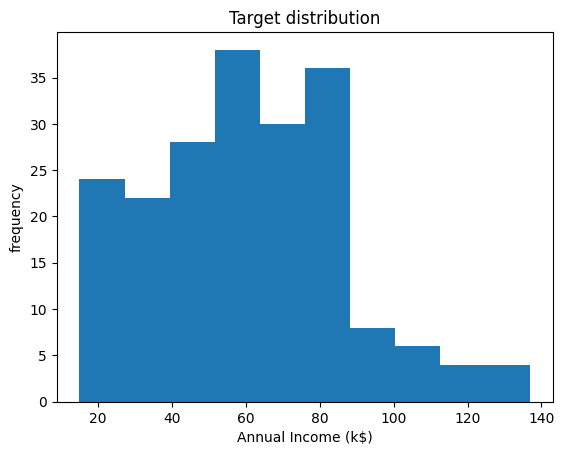

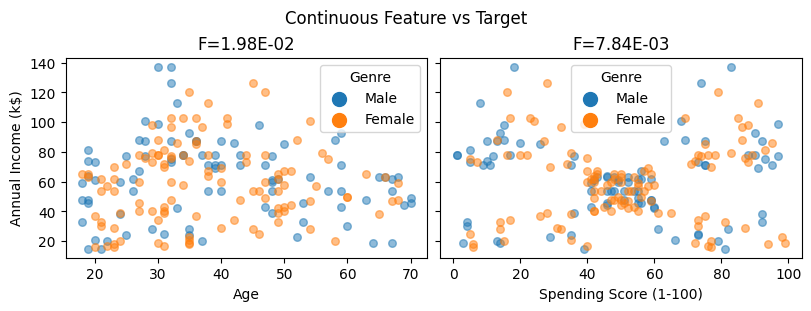

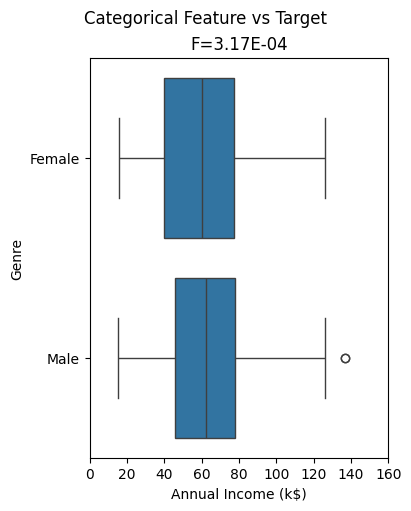

In [42]:
dabl.plot(data,target_col = 'Annual Income (k$)')


Target looks like regression


[<Axes: title={'center': 'Target distribution'}, xlabel='Age', ylabel='frequency'>,
 array([[<Axes: title={'center': 'F=-3.45E-01'}, xlabel='Spending Score (1-100)', ylabel='Age'>,
         <Axes: title={'center': 'F=1.98E-02'}, xlabel='Annual Income (k$)'>]],
       dtype=object),
 array([[<Axes: title={'center': 'F=5.82E-02'}, xlabel='Age', ylabel='Genre'>]],
       dtype=object)]

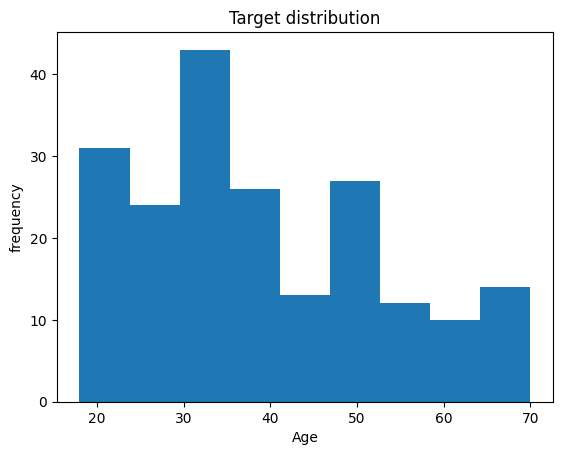

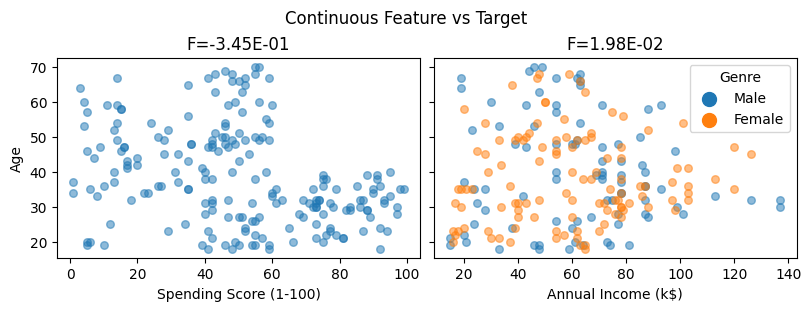

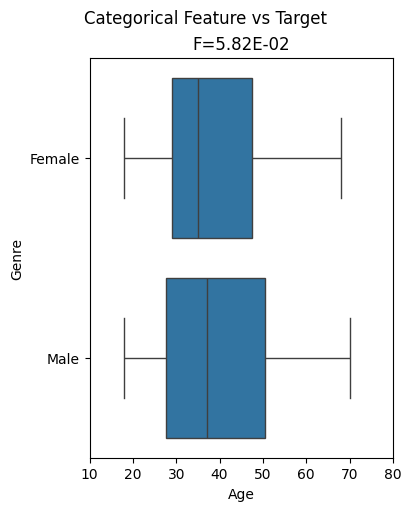

In [43]:
dabl.plot(data,target_col = 'Age')

In [47]:
# Assuming 'data' is your DataFrame
# Select only the numerical columns for correlation calculation
numerical_data = data.select_dtypes(include=['number'])

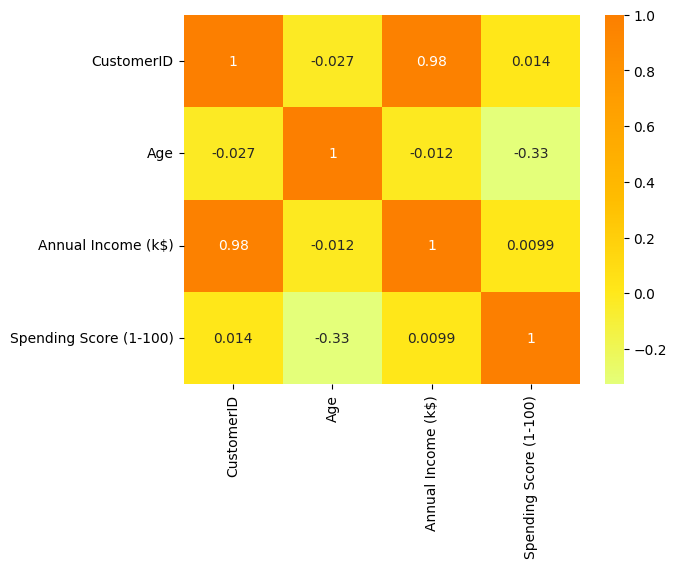

In [49]:
sns.heatmap(numerical_data.corr(), cmap = 'Wistia', annot = True)
plt.show()

In [50]:
data.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

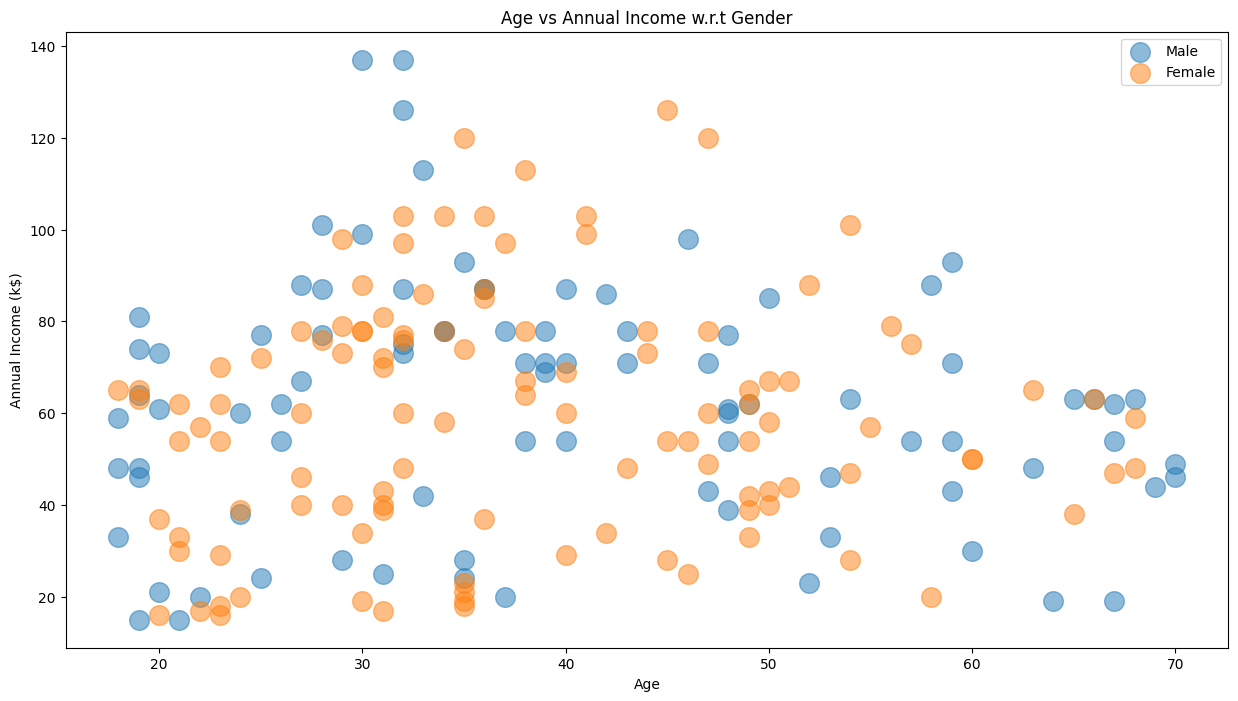

In [59]:
plt.figure(figsize = (15,8))
for genre in ['Male', 'Female']:
  plt.scatter(x= 'Age', y= 'Annual Income (k$)',
              data=data[data['Genre'] == genre],
              s=200, alpha=0.5, label=genre)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
plt.title("Age vs Annual Income w.r.t Gender")
plt.legend()
plt.show()

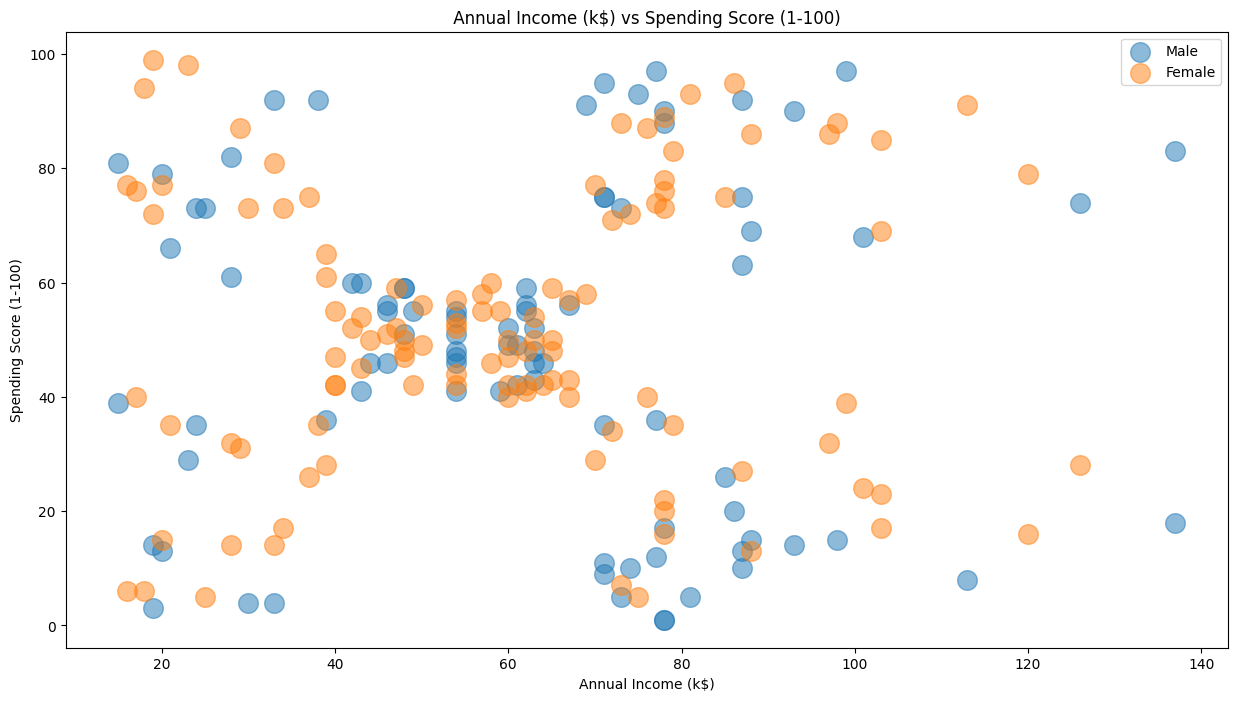

In [73]:
plt.figure(figsize = (15,8))
for genre in ['Male', 'Female']:
  plt.scatter(x= 'Annual Income (k$)', y= 'Spending Score (1-100)',
              data=data[data['Genre'] == genre],
              s=200, alpha=0.5, label=genre)
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title(" Annual Income (k$) vs Spending Score (1-100) ")
plt.legend()
plt.show()

# **Apply K-means Clustering**

In [74]:
data.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [75]:
x = data.iloc[:, [3,4]].values

In [76]:
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [77]:
from sklearn.cluster import KMeans

In [78]:
k = []
for i in range(1,11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
  kmeans.fit(x)
  k.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

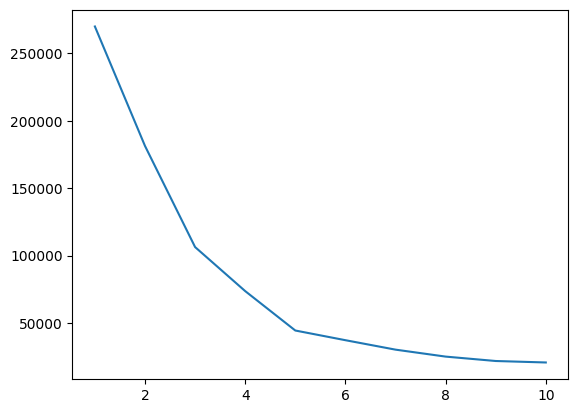

In [79]:
plt.plot(range(1,11), k)
plt.show()

In [80]:
model = KMeans(n_clusters = 5, init = 'k-means++', random_state = 0)
y_kmeans = model.fit_predict(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


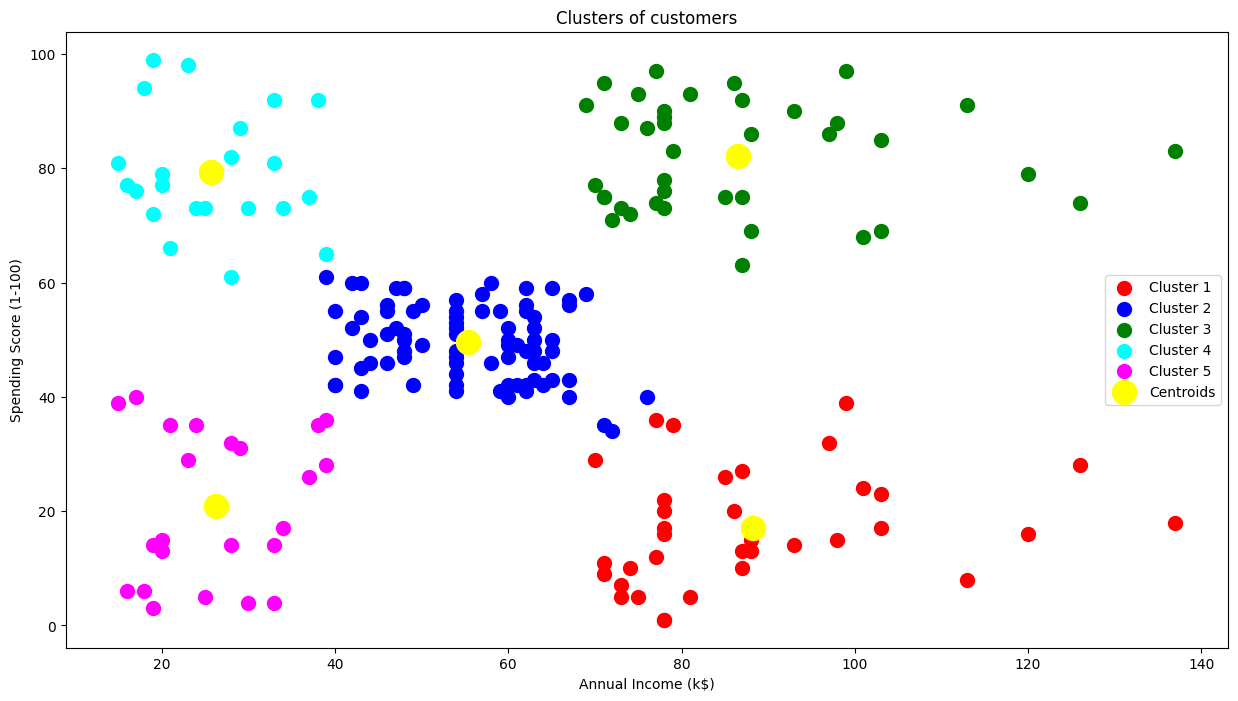

In [82]:
plt.figure(1, figsize = (15,8))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(x[y_kmeans == 4, 0], x[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()